In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd

**Importing the dataset**

In [ ]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data = data.drop("User ID",axis=1)
data = data.drop("Gender",axis=1)
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
x = data.drop("Purchased",axis=1)
y = data.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state = 42)
x_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler(feature_range=(0,1))

In [ ]:
s.fit(x_train)
scaled_train=s.transform(x_train)

In [ ]:
s.fit(x_test)
scaled_test=s.transform(x_test)
print(scaled_test)

[[0.66666667 0.024     ]
 [0.97619048 0.552     ]
 [0.23809524 0.2       ]
 [0.71428571 0.616     ]
 [0.26190476 0.072     ]
 [0.28571429 0.344     ]
 [0.69047619 0.704     ]
 [0.26190476 0.512     ]
 [0.52380952 0.448     ]
 [0.57142857 0.368     ]
 [0.4047619  0.368     ]
 [0.83333333 0.12      ]
 [0.11904762 0.232     ]
 [0.04761905 0.032     ]
 [0.28571429 0.544     ]
 [0.4047619  0.712     ]
 [0.80952381 0.152     ]
 [0.66666667 0.44      ]
 [0.5        0.184     ]
 [0.9047619  0.328     ]
 [0.0952381  0.064     ]
 [0.26190476 0.488     ]
 [0.69047619 0.032     ]
 [0.97619048 0.456     ]
 [0.02380952 0.        ]
 [0.78571429 0.032     ]
 [0.57142857 0.488     ]
 [0.45238095 0.272     ]
 [0.88095238 0.848     ]
 [0.02380952 0.016     ]
 [0.66666667 0.176     ]
 [0.02380952 0.408     ]
 [0.42857143 1.        ]
 [0.23809524 0.48      ]
 [0.52380952 0.704     ]
 [0.4047619  0.448     ]
 [0.45238095 0.288     ]
 [0.47619048 0.368     ]
 [0.19047619 0.088     ]
 [0.         0.392     ]


**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(scaled_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [ ]:
DT.predict(scaled_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, DT.predict(scaled_test))

array([[47,  5],
       [ 4, 24]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, DT.predict(scaled_test))

0.8875

**Visualising the Training set results**

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


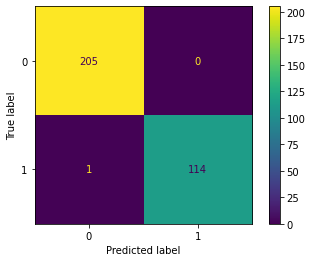

In [ ]:
plot_confusion_matrix(DT, scaled_train, y_train)  
plt.show()

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


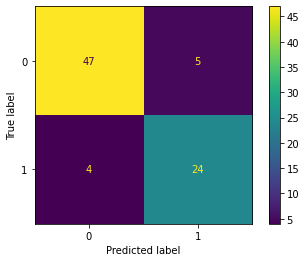

In [ ]:
plot_confusion_matrix(DT, scaled_test, y_test)
plt.show()